<a href="https://colab.research.google.com/github/lesya7maltseva/Retail-sales-analysis/blob/main/Pandas_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
#считываем файл с заказами
df_orders = pd.read_excel('/content/orders.xlsx')
df_orders.head(10)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130
5,1517416615,2022-01-13 10:39:06,22199,1,219,219,130
6,1517577392,2022-01-13 11:50:14,22199,1,219,219,130
7,1517443550,2022-01-13 08:08:04,3414,6,27,27,22
8,1517623373,2022-01-13 16:17:00,3414,3,27,27,22
9,1517496176,2022-01-13 20:59:03,47819,1,119,119,65


In [ ]:
#проверяем на количество строк - во всех столбцах одинаковое количество - пропусков нет
df_orders.describe()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
count,3.323000e+03,3323,3323.000000,3323.00000,3323.000000,3323.000000,3323.000000
mean,1.517529e+09,2022-01-13 16:02:37.557628416,22961.379175,1.23533,139.828167,130.645501,81.106229
min,1.517207e+09,2022-01-13 08:00:30,23.000000,1.00000,11.000000,4.000000,7.000000
25%,1.517454e+09,2022-01-13 12:50:33,6008.000000,1.00000,77.000000,72.000000,42.000000
50%,1.517524e+09,2022-01-13 16:26:22,12114.000000,1.00000,117.000000,109.000000,67.000000
75%,1.517605e+09,2022-01-13 19:22:00,30321.500000,1.00000,179.000000,165.000000,101.000000
max,1.517855e+09,2022-01-13 22:58:29,120497.000000,12.00000,1797.000000,1797.000000,808.000000
std,1.029182e+05,NaN,25476.196162,0.78861,104.195194,96.328751,61.505484


In [ ]:
#считываем файл с категориями товаров
df_products = pd.read_excel('/content/products.xlsx', names=['product_id',	'category','subcategory', 'name'])
#проверяем на количество строк - в столбце name 39940 значений. Интересно почему не везде прописано название продукта - в некоторых только id, категория и подкатегория.
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   40152 non-null  int64 
 1   category     40152 non-null  object
 2   subcategory  40152 non-null  object
 3   name         39940 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df_products.head(10)

,product_id,category,subcategory,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio
5,6,Молочная продукция,Йогурты,Питьевой биойогурт Слобода
6,7,Замороженная продукция,Замороженные полуфабрикаты,Чебупели сочные с мясом
7,8,Молочная продукция,Кисломолочные традиционные продукты,Сметана Простоквашино
8,9,Кондитерские изделия,Современные кондитерские изделия,Батончик Nestle Fitness
9,10,Свежие овощи,"Корнеплоды, зелень и прочие овощи",Шпинат


In [ ]:
#выбираем строки со значением null в задании этого не было,сделала просто для практики
df_products[df_products.isna().any(axis=1)]

,product_id,category,subcategory,name
821,822,Безалкогольные напитки,Воды питьевые,NaN
1372,1373,Сыры,Мягкие сыры,NaN
2439,2442,Бытовая химия,Средства для уборки,NaN
3277,3281,Гигиена,Средства личной гигиены,NaN
3440,3444,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,NaN
...,...,...,...,...
39801,104104,"Кофе, какао",Кофе,NaN
39866,104714,Безалкогольные напитки,Напитки,NaN
40057,107597,Рынок,Рынок.Сыры,NaN
40065,107897,Молочная продукция,Кисломолочные традиционные продукты,NaN


In [ ]:
# соединяем по ключу product_id
df_merged_raw = df_orders.merge(df_products, on='product_id', how='left')

In [ ]:
df_merged_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3323 non-null   int64         
 1   accepted_at    3323 non-null   datetime64[ns]
 2   product_id     3323 non-null   int64         
 3   quantity       3323 non-null   int64         
 4   regular_price  3323 non-null   int64         
 5   price          3323 non-null   int64         
 6   cost_price     3323 non-null   int64         
 7   category       3018 non-null   object        
 8   subcategory    3018 non-null   object        
 9   name           3010 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 259.7+ KB


В некоторых строках таблицы при лефт-джойне в значении категорий, подкатегорий, названия появляется NaN.Таких значений 305. Приняла решение оставить и переименовать в unknown, поскольку по деньгам эти позиции числятся

In [ ]:
df_merged_raw = df_merged_raw.fillna('unknown')

In [ ]:
df_merged_raw['accepted_at'] = pd.to_datetime(df_merged_raw['accepted_at']).dt.date
df_merged_raw.head(3)


,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,category,subcategory,name
0,1517514900,2022-01-13,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
1,1517430051,2022-01-13,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
2,1517578174,2022-01-13,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан


# **Самая ходовая товарная группа**

In [ ]:
df_most_pupular = df_merged_raw.groupby('category').agg({'quantity':'sum'}).sort_values(by = 'quantity',ascending=False).reset_index()
df_most_pupular

,category,quantity
0,Безалкогольные напитки,534
1,Молочная продукция,483
2,unknown,373
3,Свежие овощи,262
4,Кулинария,250
5,Бакалея,239
6,Хлеб и хлебобулочные изделия,218
7,Снэки,212
8,Свежие фрукты,184
9,Замороженная продукция,175


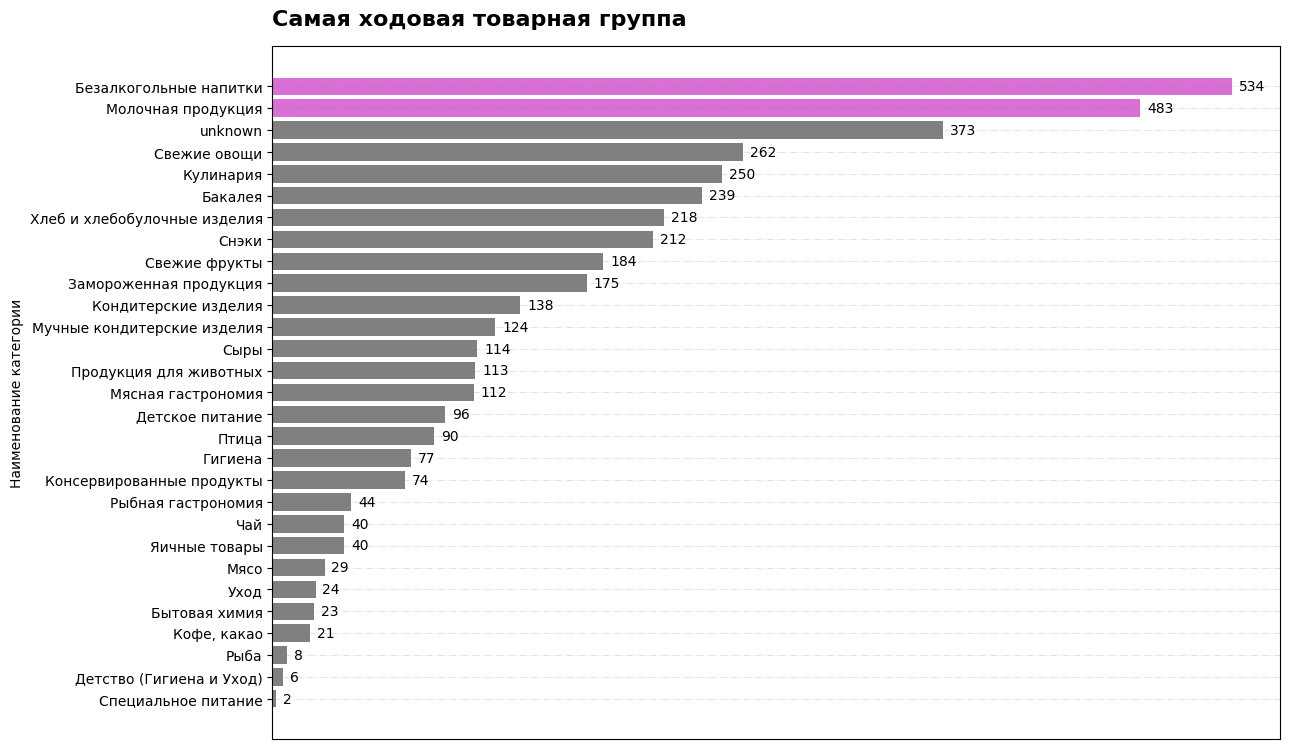

In [ ]:
#создаем обасть графика
fig, ax = plt.subplots(figsize = (13,9))

# добавим цвета на график:
max_color = 'orchid'
others = 'gray'
# безалкогольные напитки лидируют с большим отрывом, поэтому цветом выделила их
df_most_pupular['colour'] = df_most_pupular['quantity'].apply(lambda x: max_color if x >= 400 else others)
# горизонтальный барчар
bars = ax.barh(df_most_pupular['category'], df_most_pupular['quantity'], color = df_most_pupular['colour'])
ax.xaxis.set_visible(False)
ax.set_title('Самая ходовая товарная группа', fontsize=16,
              fontweight='bold', loc = 'left', pad = 15.0)
# подпишем оси
ax.set_xlabel('Количество проданного товара в штуках')
ax.set_ylabel('Наименование категории')
ax.grid(True, color = 'gray', linestyle = '-.', linewidth = 0.8, alpha = 0.2)

#чтоб не изменять сортировку в датафрейме изменим на графике
ax.invert_yaxis()
ax.bar_label(bars, padding = 5)

plt.show()

# **Распределение продаж по подкатегориям**

In [ ]:
df_merged_raw.groupby(['category','subcategory']).agg({'quantity':'sum'}).reset_index()


,category,subcategory,quantity
0,unknown,unknown,373
1,Бакалея,Все для суши,9
2,Бакалея,Зерновые для завтраков,24
3,Бакалея,Ингредиенты для готовки,21
4,Бакалея,"Крупы, бобовые",30
...,...,...,...
96,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
97,Чай,Зеленый чай,7
98,Чай,Чайные напитки,7
99,Чай,Черный чай,26


# **Найти средний чек в заданную дату**
13.01.2022

In [ ]:
# на случай если надо выбрать дату, но в данном случае не надо =_=
df_merged_raw.loc[df_merged_raw['accepted_at'] == pd.to_datetime('2022-01-13').date()]

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,category,subcategory,name
0,1517514900,2022-01-13,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
1,1517430051,2022-01-13,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
2,1517578174,2022-01-13,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
3,1517466327,2022-01-13,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
4,1517429157,2022-01-13,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
...,...,...,...,...,...,...,...,...,...,...
3318,1517405750,2022-01-13,79337,2,105,105,54,Замороженная продукция,Мороженое,Мороженое Магнат
3319,1517676281,2022-01-13,79337,1,105,105,54,Замороженная продукция,Мороженое,Мороженое Магнат
3320,1517545392,2022-01-13,11897,1,513,513,392,Продукция для животных,Товары для кошек,Корм Perfect Fit
3321,1517658904,2022-01-13,6392,2,79,79,45,Мучные кондитерские изделия,Хлебцы,Хлебцы Dr. Korner


In [ ]:
AOV = (
    df_merged_raw
    .groupby('order_id')['price']
    .sum()
    .reset_index()
    ['price'].mean()
    .round(2))
print(f"Сумма среднего чека составляет: {AOV} руб.")

Сумма среднего чека составляет: 798.04 руб.


# **Доля промо в заданной категории**

категория - "Сыры"
<br>Когда товар продается по промо-акции, его базовая цена не совпадает с фактической ценой

In [ ]:
df_cheese = df_merged_raw.loc[df_merged_raw['category'] == 'Сыры']

In [ ]:
#df_cheese['promo'] = np.where(df_cheese['regular_price'] != df_cheese['price'], 'promo', 'not') - SettingWithCopyWarning выдает
#df_cheese['promo'] = df_cheese.apply(lambda x: x['regular_price'] - x['price'], axis=1)
#df_cheese['promo'] = df_cheese['regular_price'].sub(df_cheese['price'], axis=0)

In [ ]:
df_cheese

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,category,subcategory,name
3,1517466327,2022-01-13,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
4,1517429157,2022-01-13,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
5,1517416615,2022-01-13,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
6,1517577392,2022-01-13,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
64,1517374975,2022-01-13,2922,1,239,239,136,Сыры,Мягкие сыры,Сыр Страчателла Самокат
...,...,...,...,...,...,...,...,...,...,...
3231,1517418098,2022-01-13,8139,1,180,180,104,Сыры,Твердые сычужные сыры,NaN
3232,1517332171,2022-01-13,8139,1,180,180,104,Сыры,Твердые сычужные сыры,NaN
3248,1517631130,2022-01-13,33930,1,222,222,127,Сыры,Мягкие сыры,Сыр Pretto
3249,1517293568,2022-01-13,33930,1,222,222,127,Сыры,Мягкие сыры,Сыр Pretto


In [ ]:
df_cheese['promo'] = np.where(df_cheese['regular_price'] != df_cheese['price'], 'promo', 'regular')

<ipython-input-81-076e059e9c26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cheese['promo'] = np.where(df_cheese['regular_price'] != df_cheese['price'], 'promo', 'regular')


In [ ]:
# предварительно подготовим данные для pychart
promo_cheese = df_cheese[df_cheese['promo'] == 'promo']['quantity'].sum()
all_cheese = df_cheese['quantity'].sum()
print(f'{round(promo_cheese/all_cheese * 100, 2)}% от общих продаж категории Сыры занимают промо')

30.7% от общих продаж категории Сыры занимают промо


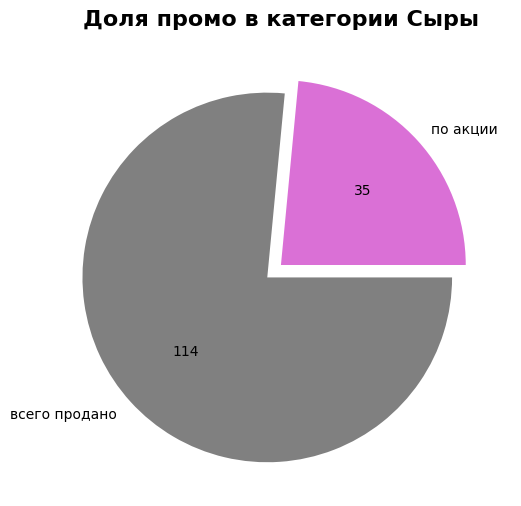

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))

ax.xaxis.set_visible(False)

labels = ['по акции', 'всего продано']
ax.pie([promo_cheese,all_cheese],
       colors = [max_color,others],
       explode = [0, 0.1],
       labels = labels,
       autopct= lambda x: f"{x * (sum([promo_cheese,all_cheese])/100):.0f}")
ax.set_title('Доля промо в категории Сыры', fontsize=16,
              fontweight='bold')
plt.show()

# **Маржа по категориям**

В рублях
<br>В %

In [ ]:
df_margine_raw = df_merged_raw.loc[:, ['category','quantity', 'price', 'cost_price']]

In [ ]:
df_margine_raw.head(3)

,category,quantity,price,cost_price
0,Рыбная гастрономия,1,169,74
1,Рыбная гастрономия,1,169,74
2,Рыбная гастрономия,1,169,74


In [ ]:
def get_margine(row):
  row['revenue'] = row['quantity'] * row['price']
  row['outlay'] = row['quantity'] * row['cost_price']
  return row

In [ ]:
df_margine = df_margine_raw.apply(lambda x: get_margine(x), axis=1)
df_margine.head(3)

,category,quantity,price,cost_price,revenue,outlay
0,Рыбная гастрономия,1,169,74,169,74
1,Рыбная гастрономия,1,169,74,169,74
2,Рыбная гастрономия,1,169,74,169,74


In [ ]:
df_margine = df_margine.groupby(['category'])[['revenue','outlay']].agg('sum').reset_index()

In [ ]:
df_margine['margine_rub'] = df_margine.apply(lambda x: x['revenue'] - x['outlay'], axis=1)
df_margine['margine_pct'] = df_margine.apply(lambda x: round(x['margine_rub'] / x['revenue']*100, 2), axis=1)
df_margine = df_margine.sort_values(by = 'margine_rub', ascending=False)
df_margine_pct = df_margine.sort_values(by = 'margine_pct', ascending=False)
df_margine

,category,revenue,outlay,margine_rub,margine_pct
0,unknown,51304,30217,21087,41.10
2,Безалкогольные напитки,46107,25734,20373,44.19
11,Кулинария,40840,22388,18452,45.18
7,Замороженная продукция,27714,14615,13099,47.26
12,Молочная продукция,37582,25089,12493,33.24
14,Мясная гастрономия,24150,13920,10230,42.36
22,Снэки,22477,12895,9582,42.63
20,Свежие овощи,33222,24216,9006,27.11
1,Бакалея,21766,13589,8177,37.57
21,Свежие фрукты,27009,19130,7879,29.17


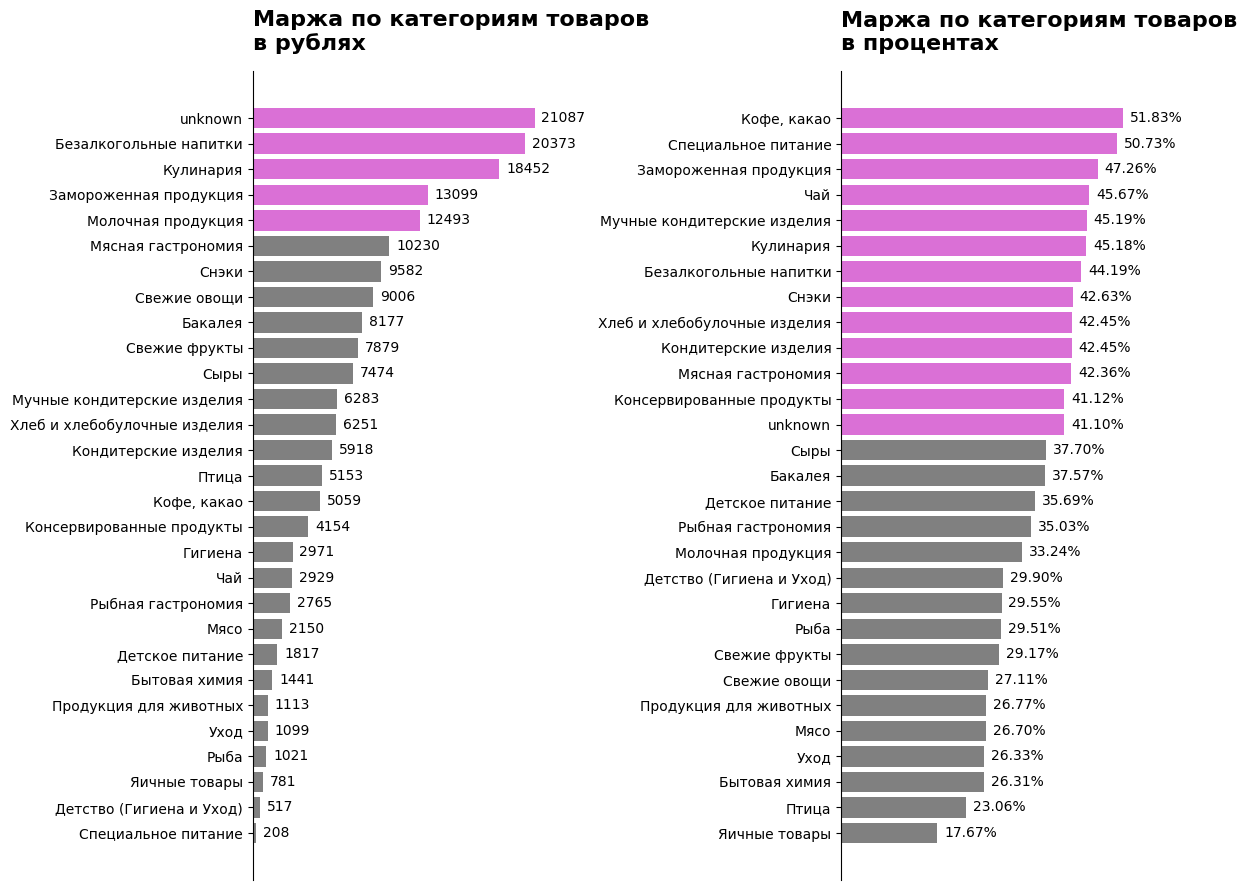

In [ ]:
#создаем обасть графика
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,9))

# добавим цвета значениям
df_margine_pct['colours_pct'] = df_margine_pct.apply(lambda x: max_color if x['margine_pct']>40.00 else others, axis = 1)
df_margine['colours_rub'] = df_margine.apply(lambda x: max_color if x['margine_rub']>10500 else others, axis = 1)

#строим левый график
bars1 = ax1.barh(df_margine['category'],
                df_margine['margine_rub'],
                color = df_margine['colours_rub'])
#убираем границы
ax1.xaxis.set_visible(False)
ax1.spines[['right', 'top', 'bottom']].set_visible(False)

#подпишем название
ax1.set_title('Маржа по категориям товаров \nв рублях', fontsize=16,
              fontweight='bold', loc = 'left', pad = 15.0)

# подпишем столбцы
ax1.bar_label(bars1, padding = 5)

#чтоб не менять сортировку в датафрэйме поменяем на оси y
ax1.invert_yaxis()

# строим правый график
bars2 = ax2.barh(df_margine_pct['category'],
                df_margine_pct['margine_pct'],
                color = df_margine_pct['colours_pct'])
#убираем границы
ax2.xaxis.set_visible(False)
ax2.spines[['right', 'top', 'bottom']].set_visible(False)
#подпишем название
ax2.set_title('Маржа по категориям товаров \nв процентах', fontsize=16,
              fontweight='bold', loc = 'left', pad = 15.0)

# подпишем столбцы
ax2.bar_label(bars2, padding = 5, fmt='%.2f%%')
#чтоб не менять сортировку в датафрэйме поменяем на оси y
ax2.invert_yaxis()
#добавим расстояние между графиками
plt.subplots_adjust(wspace = 0.7)
# убираем перекрытие между графиками
plt.tight_layout()
plt.show()


# **ABC анализ**

Сделайте ABC-анализ продаж по количеству

Сделайте ABC-анализ по сумме продаж

In [ ]:
df_ABC_raw = df

,category,revenue,outlay,margine_rub,margine_pct,colours_rub
0,unknown,51304,30217,21087,41.10,orchid
2,Безалкогольные напитки,46107,25734,20373,44.19,orchid
11,Кулинария,40840,22388,18452,45.18,orchid
7,Замороженная продукция,27714,14615,13099,47.26,orchid
12,Молочная продукция,37582,25089,12493,33.24,orchid
14,Мясная гастрономия,24150,13920,10230,42.36,gray
22,Снэки,22477,12895,9582,42.63,gray
20,Свежие овощи,33222,24216,9006,27.11,gray
1,Бакалея,21766,13589,8177,37.57,gray
21,Свежие фрукты,27009,19130,7879,29.17,gray
